## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the datasets

In [3]:
df_movies = pd.read_csv("movies.csv")
df_ratings = pd.read_csv("ratings.csv")
df_tags = pd.read_csv("tags.csv")
df_links = pd.read_csv("links.csv")

## Getting information of each dataset

In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [13]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [14]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [15]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


## Shape of movies.csv

In [7]:
df_movies.shape

(9742, 3)

## Shape of ratings.csv

In [8]:
df_ratings.shape

(100836, 4)

In [9]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Number of unique values in 'userId' in ratings.csv

In [12]:
df_ratings['userId'].nunique()

610

## Movie which received maximum number of user ratings

In [17]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [31]:
pd.merge(df_movies,df_ratings,on="movieId").groupby(["movieId","title"])['rating'].count().sort_values(ascending=False)

movieId  title                                 
356      Forrest Gump (1994)                       329
318      Shawshank Redemption, The (1994)          317
296      Pulp Fiction (1994)                       307
593      Silence of the Lambs, The (1991)          279
2571     Matrix, The (1999)                        278
                                                  ... 
4093     Cop (1988)                                  1
4089     Born in East L.A. (1987)                    1
58351    City of Men (Cidade dos Homens) (2007)      1
4083     Best Seller (1987)                          1
193609   Andrew Dice Clay: Dice Rules (1991)         1
Name: rating, Length: 9724, dtype: int64

## The correct tags submitted by users to "Matrix, The (1999)" movie

In [32]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [46]:
pd.merge(df_tags,df_movies,on="movieId")[pd.merge(df_tags,df_movies,on="movieId")["title"]=="Matrix, The (1999)"]['tag']

1270          martial arts
1271                sci-fi
1272    alternate universe
1273            philosophy
1274      post apocalyptic
Name: tag, dtype: object

## The average user rating for movie named "Terminator 2: Judgment Day (1991)"

In [48]:
pd.merge(df_movies,df_ratings,on="movieId")[pd.merge(df_movies,df_ratings,on="movieId")["title"]=="Terminator 2: Judgment Day (1991)"]['rating'].mean()

3.970982142857143

## The data distribution of user ratings for "Fight Club (1999)" movie looks like

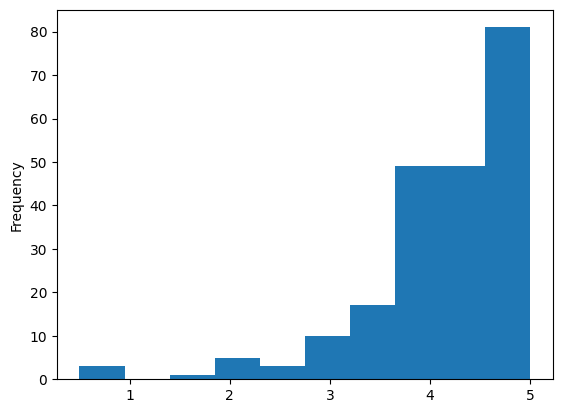

In [53]:
pd.merge(df_movies,df_ratings,on="movieId")[pd.merge(df_movies,df_ratings,on="movieId")["title"]=="Fight Club (1999)"]['rating'].plot(kind="hist")
plt.show()

## Mandatory Operations
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [123]:
groupby_ratings = df_ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
groupby_ratings.columns = ['movieId', 'rating_count', 'rating_mean']
data = pd.merge(df_movies, groupby_ratings, on='movieId', how='inner')
filtered_data = data[data['rating_count'] > 50]


## The most popular based on  average user ratings

In [124]:
filtered_data[['title','rating_mean']].sort_values(by = 'rating_mean',ascending = False).iloc[0]

title          Shawshank Redemption, The (1994)
rating_mean                            4.429022
Name: 277, dtype: object

## Top 5 popular movies based on number of user ratings

In [125]:
filtered_data[['title','rating_count']].sort_values(by = 'rating_count',ascending = False).iloc[0:5]

,title,rating_count
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278


In [126]:
filtered_data

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


## Which Sci-Fi movie is "third most popular" based on the number of user ratings

In [127]:
filtered_data[filtered_data['genres'].str.contains('Sci-Fi', case=False)].sort_values(by='rating_count', ascending=False).iloc[2]


movieId                                      480
title                       Jurassic Park (1993)
genres          Action|Adventure|Sci-Fi|Thriller
rating_count                                 238
rating_mean                                 3.75
Name: 418, dtype: object

## Webscraping of IMDB ratings of the movies

In [128]:
import requests
from bs4 import BeautifulSoup

In [129]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt"+new_id+"/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text,'html.parser')
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'}) 
    return imdb_rating.text if imdb_rating else np.nan

In [133]:
merged = pd.merge(filtered_data,df_links,on='movieId')

In [135]:
merged['imdb_ratings'] = merged['imdbId'].apply(scrapper)

In [138]:
merged.isnull().sum()

movieId         0
title           0
genres          0
rating_count    0
rating_mean     0
imdb_ratings    0
imdbId          0
tmdbId          0
dtype: int64

## The movieId of the movie which has the highest IMDB rating


In [141]:
merged[merged['imdb_ratings'] == merged['imdb_ratings'].max()]

,movieId,title,genres,rating_count,rating_mean,imdb_ratings,imdbId,tmdbId
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,9.3,111161,278.0


##  The movieId of the "Sci-Fi" movie which has the highest IMDB rating

In [143]:
sci_fi = merged[merged['genres'].str.contains('Sci-Fi')]
sci_fi[sci_fi['imdb_ratings'] == sci_fi['imdb_ratings'].max()]

,movieId,title,genres,rating_count,rating_mean,imdb_ratings,imdbId,tmdbId
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,8.8,1375666,27205.0
